<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/CIFAR_10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


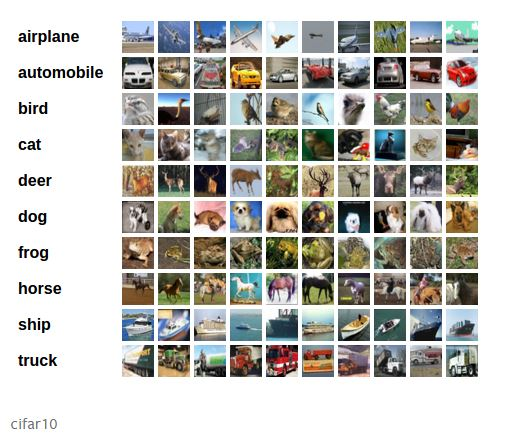

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#PyTorch


In [2]:
import torch
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms

In [3]:
batch_size = 8

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #Mean, STD

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
testset = torchvision.datasets.CIFAR10(root='./data',
                                      train=False,
                                      download=True,
                                      transform=transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=False,
                                         num_workers=2)

Files already downloaded and verified


In [9]:
len(trainloader), len(testloader)

(6250, 1250)

In [95]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))   #(C, W, H) ==> (W, H, C)
    plt.show()

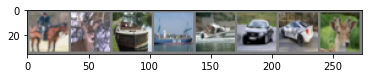

horse deer  ship  ship  ship  car   car   deer 


In [96]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [43]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool = torch.nn.MaxPool2d(kernel_size=2)
        self.fc1 = torch.nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = torch.nn.Linear(in_features=120, out_features=84)
        self.fc3 = torch.nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.nn.functional.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = torch.nn.functional.relu(x)
        x = self.pool(x)

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)

        x = self.fc2(x)
        x = torch.nn.functional.relu(x)

        x = self.fc3(x)
        return x

In [50]:
net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = net.to(device)
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [51]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [69]:
for epoch in range(20):               # loop over the dataset 10 times

    running_loss = 0.0
    running_accuracy = 0.0
    mini_batches = len(trainloader)

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
                                      # forward + backward + optimize
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_accuracy += (labels == predicted).sum().item() / batch_size
        running_loss += loss.item() / batch_size

    print(f'Epoch: {epoch+1}, Loss is: {running_loss/mini_batches: 3f}, Accuracy is: {100*running_accuracy/mini_batches}')

Epoch: 1, Loss is:  0.058089, Accuracy is: 83.302
Epoch: 2, Loss is:  0.054795, Accuracy is: 84.098
Epoch: 3, Loss is:  0.053095, Accuracy is: 84.758
Epoch: 4, Loss is:  0.052122, Accuracy is: 85.112
Epoch: 5, Loss is:  0.052077, Accuracy is: 85.05
Epoch: 6, Loss is:  0.050424, Accuracy is: 85.532
Epoch: 7, Loss is:  0.048147, Accuracy is: 86.232
Epoch: 8, Loss is:  0.049079, Accuracy is: 85.824
Epoch: 9, Loss is:  0.048691, Accuracy is: 86.112
Epoch: 10, Loss is:  0.047376, Accuracy is: 86.568
Epoch: 11, Loss is:  0.047191, Accuracy is: 86.51
Epoch: 12, Loss is:  0.046337, Accuracy is: 87.038
Epoch: 13, Loss is:  0.046650, Accuracy is: 86.572
Epoch: 14, Loss is:  0.046043, Accuracy is: 86.774
Epoch: 15, Loss is:  0.045624, Accuracy is: 86.998
Epoch: 16, Loss is:  0.044260, Accuracy is: 87.59
Epoch: 17, Loss is:  0.043822, Accuracy is: 87.594
Epoch: 18, Loss is:  0.044336, Accuracy is: 87.546
Epoch: 19, Loss is:  0.042566, Accuracy is: 88.058
Epoch: 20, Loss is:  0.042045, Accuracy is:

In [72]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
test_batch_size = len(testloader)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item() / 8

print(f'Accuracy of the network on the 10000 test images: {100 * correct / test_batch_size:.3f} %')

Accuracy of the network on the 10000 test images: 60.680 %


In [74]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 64.7 %
Accuracy for class: car   is 75.4 %
Accuracy for class: bird  is 50.0 %
Accuracy for class: cat   is 38.9 %
Accuracy for class: deer  is 49.7 %
Accuracy for class: dog   is 48.3 %
Accuracy for class: frog  is 73.4 %
Accuracy for class: horse is 70.1 %
Accuracy for class: ship  is 70.9 %
Accuracy for class: truck is 65.4 %


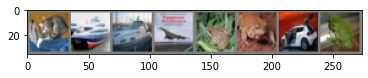

Predicted:  cat   ship  ship  ship  frog  frog  frog  frog 


In [98]:
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

images = images.to(device)
labels = labels.to(device)

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(batch_size)))

#TensorFlow

In [99]:
import tensorflow as tf

In [100]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [101]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [102]:
# Reduce pixel values (Noramlize)
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


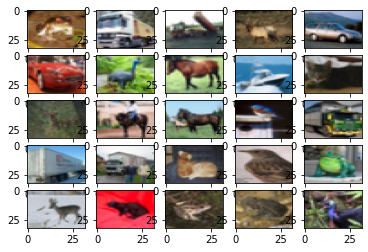

In [103]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()

In [108]:
# number of classes
K = len(set(y_train))

inp = tf.keras.layers.Input(shape=x_train[0].shape)
x = tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu', padding='same')(inp)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(filters=128,kernel_size=3, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=128,kernel_size=3, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(K, activation='softmax')(x)

model = tf.keras.models.Model(inp, x)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0   

In [109]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

In [111]:
# Fit
history = model.fit(x_train,
              y_train,
              validation_data=(x_test, y_test),
              epochs=50)

Epoch 1/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1460 - accuracy: 0.5925 - val_loss: 1.0150 - val_accuracy: 0.6517
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8097 - accuracy: 0.7172 - val_loss: 1.0246 - val_accuracy: 0.6593
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6749 - accuracy: 0.7678 - val_loss: 0.8722 - val_accuracy: 0.7125
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5652 - accuracy: 0.8070 - val_loss: 0.6981 - val_accuracy: 0.7692
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4861 - accuracy: 0.8341 - val_loss: 0.5848 - val_accuracy: 0.8084
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4130 - accuracy: 0.8570 - val_loss: 0.6506 - val_accuracy: 0.7904
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3484 - accuracy: 0.8797 - val_loss: 0.6650 - val_ac

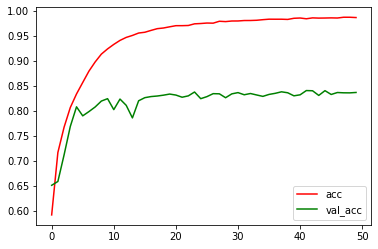

In [113]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

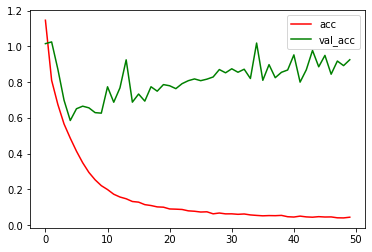

In [114]:
# Plot loss per iteration
plt.plot(history.history['loss'], label='acc', color='red')
plt.plot(history.history['val_loss'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 0s 357ms/step
Original label is cat and predicted label is cat


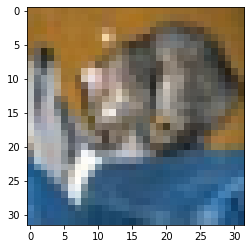

In [115]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))
